# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
X_train.shape

(39209, 32, 32, 3)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
# the number of training examples
n_train = len(X_train)

# the number of testing examples.
n_test = len(X_test)

# the shape of an traffic sign image?
image_shape = X_train.shape

# the number of classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
classes=set(y_train)
print(classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


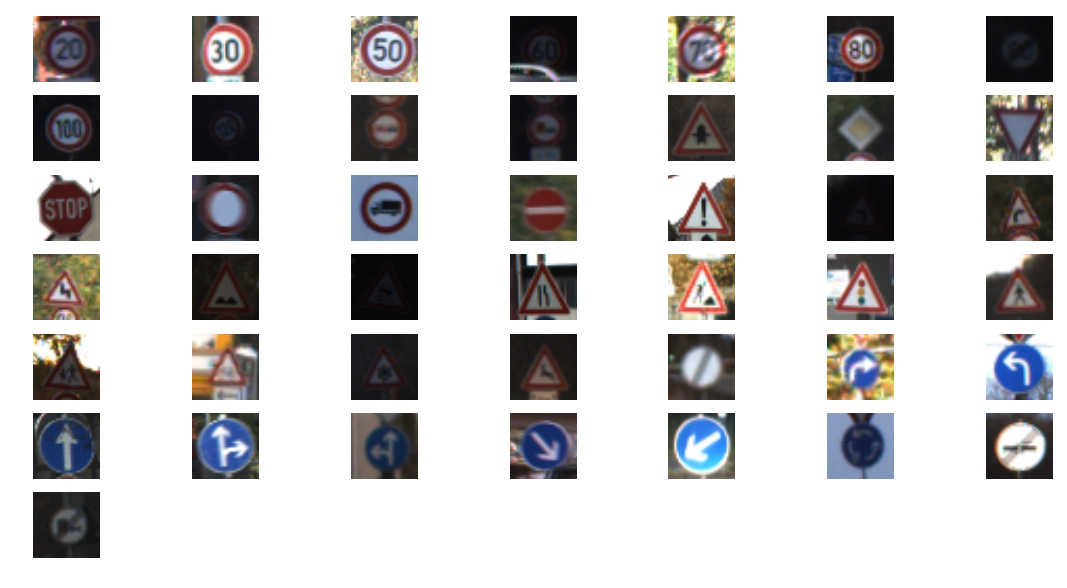

In [7]:
import pylab
pylab.rcParams['figure.figsize'] = (14, 7)

label_type=[]
for i  in  range(0,n_classes):
    plt.subplot(7,7,i+1)
    label_type.append(X_test[np.where( y_test == i )[0][0],:,:,:].squeeze())
    img = plt.imshow(X_test[np.where( y_test == i )[0][0],:,:,:].squeeze())
    plt.axis('off')

### continnue to show the picturs

In [8]:
import random

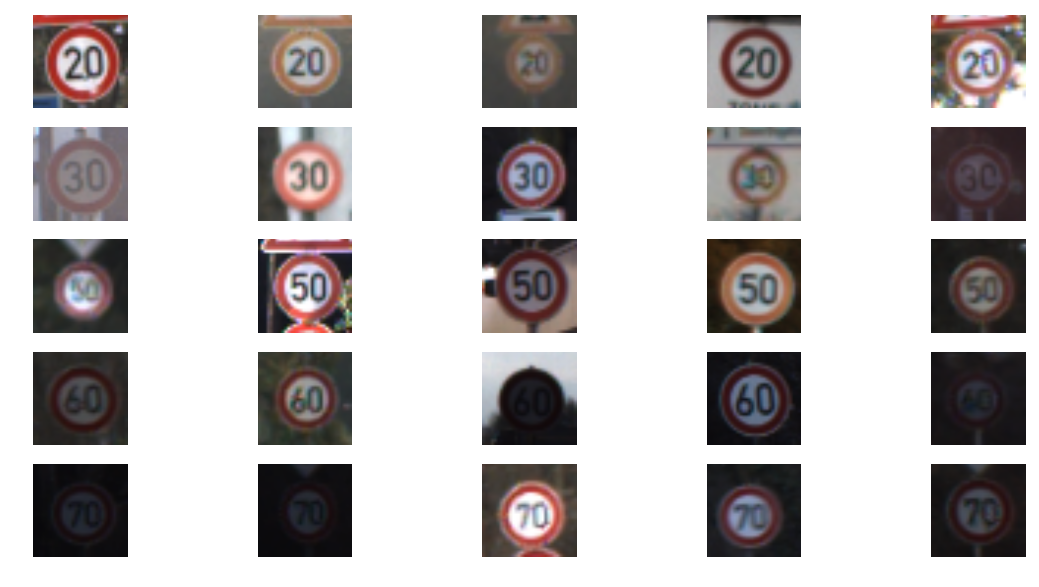

In [9]:
import random
size=5
count=1
for i in range(5):
    index=(y_train==i)
    subset=X_train[index,]
    for x in range(5):
        img=random.choice(subset)
        plt.subplot(5,size,count)
        plt.axis('off')
        plt.imshow(img)
        count+=1

## Let's continue 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
learning_rate = 0.001
batch_size = 128
training_epochs = 30

In [11]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [16]:
#normalize traffic sign data
#X_tain=(X_train-128)/256
#y_train=(y_train-128)/256

In [19]:
#normalize traffic sign data
#X_test=(X_test-128)/256
#y_test=(y_test-128)/256

In [12]:
from tensorflow.contrib.layers import flatten
mean_u=0
sigma=0.1
#save_file = 'model.ckpt'

#layer 1 whcihsaver = tf.train.Saver is 32*32*3 as input and 28*28*12 as output
conv1_w=tf.Variable(tf.truncated_normal(shape=(5,5,3,12),mean=mean_u,stddev=sigma))
conv1_b=tf.Variable(tf.zeros(12))

#layer2 which is 14*14*12 as input, and the output is 10*10*16 as output
conv2_w=tf.Variable(tf.truncated_normal(shape=(5,5,12,16),mean=mean_u,stddev=sigma))
conv2_b=tf.Variable(tf.zeros(16))

#layer 3:
fun1_w=tf.Variable(tf.truncated_normal(shape=(400,120),mean=mean_u,stddev=sigma))
fun1_b=tf.Variable(tf.zeros(120))

    
#layer 4
fun2_w=tf.Variable(tf.truncated_normal(shape=(120,84),mean=mean_u,stddev=sigma))
fun2_b=tf.Variable(tf.zeros(84))

#layrer 5
fun3_w=tf.Variable(tf.truncated_normal(shape=(84,43),mean=mean_u,stddev=sigma))
fun3_b=tf.Variable(tf.zeros(43))

def Neuralnets(X):
    #layer 1 whcih is 32*32*3 as input and 28*28*12 as output
    conv1=tf.nn.conv2d(X,conv1_w,strides=[1,1,1,1],padding='VALID')+conv1_b
    
    #apply activation:
    conv1=tf.nn.relu(conv1)
    
    #apply max_pooling: output is 14*14*12
    conv1=tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #layer2 which is 14*14*12 as input, and the output is 10*10*16 as output
    conv2=tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID')+conv2_b
    conv2=tf.nn.relu(conv2)
    #apply max pooling and we get 5*5*16 output
    conv2=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #flatten we get 400
    fun0=flatten(conv2)
    
    #layer 3:
    fun1=tf.matmul(fun0,fun1_w)+fun1_b
    
    #apply actiovation: output 120
    fun1=tf.nn.relu(fun1)
    
    #layer 4
    fun2=tf.matmul(fun1,fun2_w)+fun2_b
    
    #apply actiovation:
    fun2=tf.nn.relu(fun2)
    
    logits=tf.matmul(fun2,fun3_w)+fun3_b
    return logits

In [13]:
#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=Neuralnets(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

In [14]:
cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [15]:
X_train.shape

(39209, 32, 32, 3)

## firstly, let's try to run it to see whether the neural network works, and then we can try to use some techniques to improve the result!

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train,y_train,test_size=0.2)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_epochs):
        X_train1,y_train1=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        v_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(v_accuracy))
        print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))
    #saver.save(sess, save_file)

we are training our model

epoch1:
the validation accuracy:0.679

epoch2:
the validation accuracy:0.840

epoch3:
the validation accuracy:0.901

epoch4:
the validation accuracy:0.929

epoch5:
the validation accuracy:0.944

epoch6:
the validation accuracy:0.947

epoch7:
the validation accuracy:0.958

epoch8:
the validation accuracy:0.957

epoch9:
the validation accuracy:0.962

epoch10:
the validation accuracy:0.975

epoch11:
the validation accuracy:0.969

epoch12:
the validation accuracy:0.972

epoch13:
the validation accuracy:0.981

epoch14:
the validation accuracy:0.970

epoch15:
the validation accuracy:0.978

epoch16:
the validation accuracy:0.976

epoch17:
the validation accuracy:0.978

epoch18:
the validation accuracy:0.975

epoch19:
the validation accuracy:0.978

epoch20:
the validation accuracy:0.975

epoch21:
the validation accuracy:0.986

epoch22:
the validation accuracy:0.983

epoch23:
the validation accuracy:0.980

epoch24:
the validation accuracy:0.985

epoch25:
the validatio

### you can see that the validation accuracy is over 98% ,but normally we only get 86%-90% testing accuracy, so we need to improve it! Firstly, I am trying to use regularization to improve it! Before doing that, let's split the X_train data into train set and validation set to test which regularization parameter is the best!

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Firstly, I extracted data from traing file and testing file, and save those data into X_train and X_test. Then, I split the train data into two parts:splitting the train data into 80% and 20%, and view 80% as train data and 20% as validation data! Then, I am trying to use regularization function at this time is that I want to try to solve overfitting problems in this neural network. Since overfitting could highly decrease the testing accuracy. so use regularization can avoid overfitting in some sense. If so, it can be likely to improve the testing accuracy of the neural network! Also, I think normalization of the data is also very likely to improve the testing accuracy since the data will be more easily handled. To be more specific, since our pictures have many feayures, and every feature has different scales, so normalization can make data viewed in the same scale. If so, the neural network algorothms can help us get better testing accuracy! There is also another thing we need to notice that, since the labels of pictures have 43 features, so I use one_hot functions to convert my pictures' label into one_hot array. Doing this can use probability to predict which feature is closest to 1, and slect the output label which has largest probabily as our predicted label! Thus, right now, I am trying to use L2-regularization to get my test accuracy, and then use normalization to normalize my data set to see whether we can get better test accuracy, and compare with my original result! Then, use more layers and dropout to see whether I can dramatically increase my test accuracy!

In [17]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train,y_train,test_size=0.2)

In [18]:
print(len(training_data))
print(len(validation_data))
print(len(X_train))
print(len(training_label))
print(len(validation_label))

31367
7842
39209
31367
7842


In [19]:
#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=Neuralnets(x)
beta=0.001
rf1_w=beta*tf.nn.l2_loss(conv1_w)
rf1_b=beta*tf.nn.l2_loss(conv1_b)
rf2_w=beta*tf.nn.l2_loss(conv2_w)
rf2_b=beta*tf.nn.l2_loss(conv2_b)
rf3_w=beta*tf.nn.l2_loss(fun1_w)
rf3_b=beta*tf.nn.l2_loss(fun1_b)
rf4_w=beta*tf.nn.l2_loss(fun2_w)
rf4_b=beta*tf.nn.l2_loss(fun2_b)
rf5_w=beta*tf.nn.l2_loss(fun3_w)
rf5_b=beta*tf.nn.l2_loss(fun3_b)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)+rf1_w+rf1_b+rf2_w+rf2_b+rf3_w+rf3_b+rf4_w+rf4_b+rf5_w+rf5_b
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

In [20]:
cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [21]:
training_data_nets=training_data/256
validation_data_nets=validation_data/256
test_data_nets=X_test/256

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data_nets)
    print("we are training our model")
    print()
    for i in range(training_epochs):
        X_train_new,y_train_new=shuffle(training_data_nets,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data_nets,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:test_data_nets,y:y_test}))
    print()

we are training our model

epoch1:
the validation accuracy:0.749
epoch2:
the validation accuracy:0.881
epoch3:
the validation accuracy:0.926
epoch4:
the validation accuracy:0.940
epoch5:
the validation accuracy:0.935
epoch6:
the validation accuracy:0.954
epoch7:
the validation accuracy:0.965
epoch8:
the validation accuracy:0.965
epoch9:
the validation accuracy:0.975
epoch10:
the validation accuracy:0.974
epoch11:
the validation accuracy:0.973
epoch12:
the validation accuracy:0.973
epoch13:
the validation accuracy:0.979
epoch14:
the validation accuracy:0.976
epoch15:
the validation accuracy:0.983
epoch16:
the validation accuracy:0.978
epoch17:
the validation accuracy:0.981
epoch18:
the validation accuracy:0.984
epoch19:
the validation accuracy:0.984
epoch20:
the validation accuracy:0.970
epoch21:
the validation accuracy:0.976
epoch22:
the validation accuracy:0.983
epoch23:
the validation accuracy:0.985
epoch24:
the validation accuracy:0.981
epoch25:
the validation accuracy:0.977
epoch26

### after adding regularization function(beta is 0.001 is appropriate in this case), we get aboout 97% validation accuracy at the end, and we usually have testing accuracy 89%-93% roghly! In some sense, it didn't improve a lot! Thus, we need to think about another way to improve our testing accuracy

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Firstly, I extracted data from traing file and testing file, and save those data into X_train and X_test. Then, I split the train data into two parts:splitting the train data into 80% and 20%, and view 80% as train data and 20% as validation data! Originally, I didn't use regularization function to prevent my neural network model from overfitting, so the thing is that I got really high validation accuracy but low test accuracy. Now, in this model above, I add L2 regularization functions to my model. My method is that as for every layer, I add all the square of parameters toegther and get their sums. After that,add them to my loss_operation functions, and then use AdamOptimizer algorithm to train it, and get the best validation accuracy as well as possible! Use L2_functions to regularize can actually improve my test accuracy in some sense, but it is not that obvious! Thus, I am trying to normalize my data set and use dropout technique to reaplace my L2 regularization, and to see whether I can get better test accuracy!

### now we need to reconstuct our neural nets so that we can improve our testing accuracy, one is that using dropout and add more layers in this neural nets

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train,y_train,test_size=0.2)

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

dropout=0.80

#save_file = 'model_new.ckpt'



from tensorflow.contrib.layers import flatten
def LeNet(x):    
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    newconv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    newconv1_b = tf.Variable(tf.zeros(6))
    newconv1   = tf.nn.conv2d(x, newconv1_W, strides=[1, 1, 1, 1], padding='VALID') + newconv1_b

    # SOLUTION: Activation.
    newconv1 = tf.nn.relu(newconv1)
    
    newconv2_W=tf.Variable(tf.truncated_normal(shape=(3,3,6,12),mean=mu,stddev=sigma))
    newconv2_b=tf.Variable(tf.zeros(12))
    newconv2=tf.nn.conv2d(newconv1,newconv2_W,strides=[1,1,1,1],padding='SAME')+newconv2_b    
    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    newconv2 = tf.nn.max_pool(newconv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    newconv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 16), mean = mu, stddev = sigma))
    newconv3_b = tf.Variable(tf.zeros(16))
    newconv3   = tf.nn.conv2d(newconv2, newconv3_W, strides=[1, 1, 1, 1], padding='VALID') + newconv3_b
    
    # SOLUTION: Activation.
    newconv3 = tf.nn.relu(newconv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    newconv3 = tf.nn.max_pool(newconv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    newfc0 = flatten(newconv3)
    newfc0 = tf.nn.dropout(newfc0,dropout)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    newfc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    newfc1_b = tf.Variable(tf.zeros(120))
    newfc1   = tf.matmul(newfc0, newfc1_W) + newfc1_b
    
    # SOLUTION: Activation.
    newfc1    = tf.nn.relu(newfc1)
    #add dropout
    newfc1=tf.nn.dropout(newfc1,dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    newfc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    newfc2_b  = tf.Variable(tf.zeros(84))
    newfc2    = tf.matmul(newfc1, newfc2_W) + newfc2_b
    
    # SOLUTION: Activation.
    newfc2    = tf.nn.relu(newfc2)
    #add dropout 
    newfc2 = tf.nn.dropout(newfc2, dropout)
    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    newfc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    newfc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(newfc2, newfc3_W) + newfc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Firstly,we have 32\*32\*3 imput, firstly I set my first kernel dimension as (5,5,3,6), then using cnn to transform into 28\*28\*6 output(the stride in this layer is [1,1,1,1]. After that, I use Relu function to activate this layer's output. In the second layer, I set the dimension of my kernel as [3,3,6,12] and the stride as [1,1,1,1], and then I use CNN function again to transform it into 28\*28\*12 output(I set argument VALId='same' at this time). After that, I use max_pool function to change the current layer into 14\*14\*12(the stride is [1,2,2,1]). At the next layer(layer 3), I set the dimension of the kernel as [5,5,12,16] and the stride is [1,1,1,1]. Then, I transform it into 10\*10\*16 output using tf.nn.conv2d function. After that, I use max_pool functions to make it become 5\*5\*16 output using [1,2,2,1] stride. Finally, flatten data and get a layrer having 400 neural nodes. Next, I use dropout function to ignore 20% nodes in this layer. Then, we can simulate multilayer neural network to transform the current layer become a layer having 120 output nodes. At the next layer, using dropout technique to ignore 20% nodes, and make it become a layer having 80 nodes.  Finally, I can use matrix multiplication to change it become a layer having 43 nodes! 

In [25]:
### Train your model here.
### Feel free to use as many code cells as needed.

#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=LeNet(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [26]:
training_data_lenet=training_data/256
validation_data_lenet=validation_data/256
test_data_lenet=X_test/256

In [28]:
training_times=30
save_file = 'train_model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data_lenet)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data_lenet,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data_lenet,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:test_data_lenet,y:y_test}))
    print()
    saver.save(sess, save_file)

we are training our model

epoch1:
the validation accuracy:0.686
epoch2:
the validation accuracy:0.827
epoch3:
the validation accuracy:0.878
epoch4:
the validation accuracy:0.905
epoch5:
the validation accuracy:0.925
epoch6:
the validation accuracy:0.934
epoch7:
the validation accuracy:0.944
epoch8:
the validation accuracy:0.948
epoch9:
the validation accuracy:0.953
epoch10:
the validation accuracy:0.952
epoch11:
the validation accuracy:0.960
epoch12:
the validation accuracy:0.961
epoch13:
the validation accuracy:0.963
epoch14:
the validation accuracy:0.965
epoch15:
the validation accuracy:0.964
epoch16:
the validation accuracy:0.970
epoch17:
the validation accuracy:0.963
epoch18:
the validation accuracy:0.966
epoch19:
the validation accuracy:0.975
epoch20:
the validation accuracy:0.970
epoch21:
the validation accuracy:0.972
epoch22:
the validation accuracy:0.971
epoch23:
the validation accuracy:0.969
epoch24:
the validation accuracy:0.971
epoch25:
the validation accuracy:0.970
epoch26

### you can see that the testing accuracy has improved a little compared to previous two cases after adding dropout in this case! Normally, we can get testing accuracy >=93% . In this case, I used dropout and normalize my data set, that's why I can get >=93% test accuracy normally! Thus, compared toi previous two cases, it is a huge improvement!

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** In this case, I use adaoptimizer function to train my neural network mode since it can increase the speed of training speed(compared to traditional SGD algorithms)! Also, I normalize my data set, and it turns out that normalization can help my neural network a lot, and it helps to increase my test accuracy! Then, the reason why I set epochs as 30 is that my neural network model couldn't increase its validation accuracy very well after 25 epochs after trying many experiments. Also, if I set epochs much lower than 30(for example 20), my neural network would haven't got its best accurac, and it may still be able to get better validation accuracy. That's why I use epochs 30 as my training epochs!

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I fistly need to think about how to construct the layers of the neural network. After that, if the testing accuracy is not good, we need to add more hidden layers on it. Also, we still need to adjust batch-size so that we can get better result. In order to improve the predicting result, I tried to use L2_loss function to prevent the neural network from overfitting, but it turns out that it didn't improve a lot! And then, I added dropout technique in my neural network and add one more hidden layers, and I found that the testting accuracy can improve, and the testing accuracy becomes more stable! 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

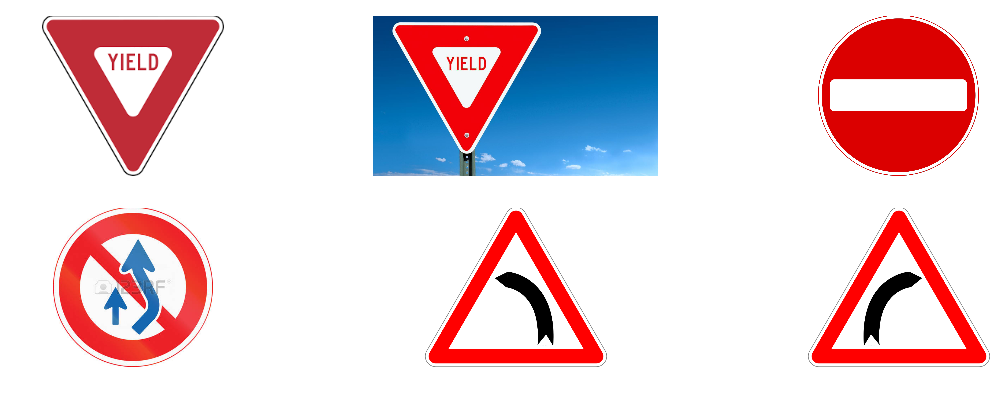

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image1=mpimg.imread('yield.png')
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(image1)

image2=mpimg.imread('yield2.jpg')
plt.subplot(3,3,2)
plt.axis('off')
plt.imshow(image2)

image3=mpimg.imread('no entry.png')
plt.subplot(3,3,3)
plt.axis('off')
plt.imshow(image3)

image4=mpimg.imread('no passing.jpg')
plt.subplot(3,3,4)
plt.axis('off')
plt.imshow(image4)

image5=mpimg.imread('dangerous-curve-to-the-left.png')
plt.subplot(3,3,5)
plt.axis('off')
plt.imshow(image5)

image6=mpimg.imread('dangerous-curve-to-the-right.png')
plt.subplot(3,3,6)
plt.axis('off')
plt.imshow(image6)

label=[13,13,17,9,19,20]

In [30]:
print(image1.shape)
print(image2.shape)
print(image3.shape)
print(image4.shape)
print(image5.shape)
print(image6.shape)

(211, 239, 3)
(787, 1400, 3)
(1024, 1024, 4)
(450, 450, 3)
(720, 816, 4)
(720, 816, 4)


In [31]:
resized_image1 = cv2.resize(image1, (32, 32))
resized_image2= cv2.resize(image2 ,(32, 32))
resized_image3= cv2.resize(image3,(32, 32))
resized_image4=cv2.resize(image4,(32, 32))
resized_image5=cv2.resize(image5,(32, 32))
resized_image6=cv2.resize(image6,(32, 32))

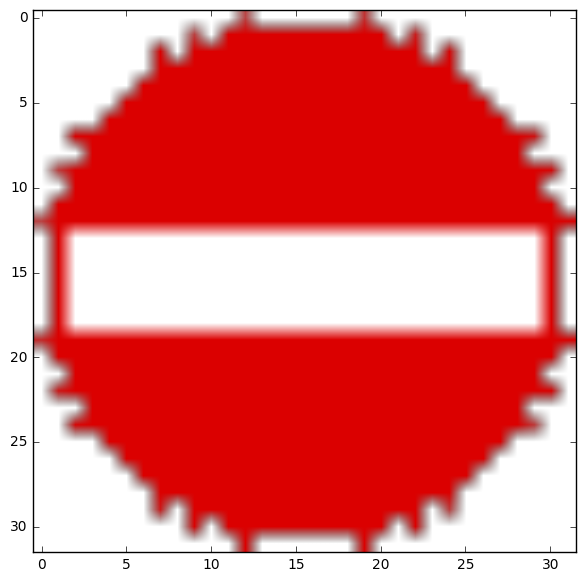

In [32]:
plt.imshow(resized_image3)

In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
selected_images=[]
selected_images.append(resized_image1[:,:,0:3])
selected_images.append(resized_image2[:,:,0:3]) 
selected_images.append(resized_image3[:,:,0:3])
selected_images.append(resized_image4[:,:,0:3]) 
selected_images.append(resized_image5[:,:,0:3])
selected_images.append(resized_image6[:,:,0:3])
selected_images=np.array(selected_images)
selected_images.shape

(6, 32, 32, 3)

In [34]:
label=np.array(label)
label
image=selected_images

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  Over here, I downloaded a test file from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset website, and got the data! I random choose 9 pictures from the test data set and their coreesponding labels. The difficulty thing form me is that I need to make sure the dimension of the images should be the same as the imput layer's dimension. It so, I can use my neural network model to predict the labels of the selected the images!

In [35]:
dic=['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',\
     'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',\
     'No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection','Priority road',\
     'Yield','Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry','General caution',\
     'Dangerous curve to the left','Dangerous curve to the right','Double curve','Bumpy road','Slippery road',\
     'Road narrows on the right','Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing'\
     'Beware of ice/snow','Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',\
     'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',\
     'End of no passing','End of no passing by vehicles over 3.5 metric tons']


In [36]:
dic[6]

'End of speed limit (80km/h)'

In [37]:
#cannot restore in ipython notebook(no idea why), so I can only re-set my training and then compute the selected images' prediction accuracy
'''
training_times=30
predict=tf.argmax(logits,1)

saver = tf.train.Saver()
countaccuracy=0
save_file_1='train_model.ckpt.data-00000-of-00001'
save_file_2='train_model.ckpt.index'
save_file_3='train_model.ckpt.meta'


with tf.Session() as sess:
    saver.restore(sess, save_file_3)
    res=predict.eval({x:image})
    for i in range(9):
        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))
        print("more specifically, the predicted meaning is ",dic[res[i]])
        if(res[i]==label[i]):
            countaccuracy+=1
    print("the total number of correct prediction is ",countaccuracy)
    print("the accuracy is ",countaccuracy/9)
'''


'\ntraining_times=30\npredict=tf.argmax(logits,1)\n\nsaver = tf.train.Saver()\ncountaccuracy=0\nsave_file_1=\'train_model.ckpt.data-00000-of-00001\'\nsave_file_2=\'train_model.ckpt.index\'\nsave_file_3=\'train_model.ckpt.meta\'\n\n\nwith tf.Session() as sess:\n    saver.restore(sess, save_file_3)\n    res=predict.eval({x:image})\n    for i in range(9):\n        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))\n        print("more specifically, the predicted meaning is ",dic[res[i]])\n        if(res[i]==label[i]):\n            countaccuracy+=1\n    print("the total number of correct prediction is ",countaccuracy)\n    print("the accuracy is ",countaccuracy/9)\n'

In [38]:
training_times=30
predict=tf.argmax(logits,1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data_lenet,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data_lenet,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:test_data_lenet,y:y_test}))
    print()
    res=predict.eval({x:image})
    countaccuracy=0
    for i in range(6):
        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))
        print("more specifically, the predicted meaning is ",dic[res[i]])
        if(label[i]==res[i]):
            countaccuracy+=1
    print("the total accuracy of my selected images is: ",countaccuracy/6)

        #print("and the the predicted label is", predict.eval({x:selected_images[i]}))

we are training our model

epoch1:
the validation accuracy:0.691
epoch2:
the validation accuracy:0.829
epoch3:
the validation accuracy:0.865
epoch4:
the validation accuracy:0.901
epoch5:
the validation accuracy:0.917
epoch6:
the validation accuracy:0.933
epoch7:
the validation accuracy:0.936
epoch8:
the validation accuracy:0.952
epoch9:
the validation accuracy:0.946
epoch10:
the validation accuracy:0.953
epoch11:
the validation accuracy:0.963
epoch12:
the validation accuracy:0.961
epoch13:
the validation accuracy:0.966
epoch14:
the validation accuracy:0.967
epoch15:
the validation accuracy:0.970
epoch16:
the validation accuracy:0.969
epoch17:
the validation accuracy:0.968
epoch18:
the validation accuracy:0.973
epoch19:
the validation accuracy:0.973
epoch20:
the validation accuracy:0.973
epoch21:
the validation accuracy:0.968
epoch22:
the validation accuracy:0.974
epoch23:
the validation accuracy:0.975
epoch24:
the validation accuracy:0.974
epoch25:
the validation accuracy:0.978
epoch26

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I think the predicting accuacy is very well for my selected images, it is always 3/6 accuracy at the most time, and sometimes I got >=50%. The reason why the total accuracy of my selected iamges is very low is that the images I chose probably are from German. I Googled those pictures, some of them are from Japan, and some of them are from Sinagpore. Maybe two contries don't have the same traffic sign for the same traffic meaning. Now,let's output the top-3 probabilities to see whether the prdicted label belongs to the top-3 predicted signs! 

In [41]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
training_times=30
predict=tf.argmax(logits,1)
showprob=tf.nn.top_k(tf.nn.softmax(logits), k=3)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data_lenet,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:test_data_lenet,y:y_test}))
    print()
    res=predict.eval({x:image})
    prob=sess.run(showprob,feed_dict={x:image})
    countaccuracy=0
    for i in range(6):
        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))
        print("The predicted meaning is ",dic[res[i]],"Actual label of this picture is",label[i])
        print()
        if(label[i]==res[i]):
            countaccuracy+=1
    print("predictng accuracy of the images selected is :",countaccuracy/6)
    print(prob)

we are training our model

the test accuracy after using regularization is: 0.927396

the neural network predicts picture 1 as label 13
The predicted meaning is  Yield Actual label of this picture is 13

the neural network predicts picture 2 as label 35
The predicted meaning is  Go straight or right Actual label of this picture is 13

the neural network predicts picture 3 as label 17
The predicted meaning is  No entry Actual label of this picture is 17

the neural network predicts picture 4 as label 25
The predicted meaning is  Road work Actual label of this picture is 9

the neural network predicts picture 5 as label 18
The predicted meaning is  General caution Actual label of this picture is 19

the neural network predicts picture 6 as label 20
The predicted meaning is  Dangerous curve to the right Actual label of this picture is 20

predictng accuracy of the images selected is : 0.5
TopKV2(values=array([[  1.00000000e+00,   9.48642423e-13,   1.05037188e-16],
       [  1.00000000e+00

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.



**Answer:** No, the predicted result is not always in the top-3 options after checking. As for picture1, the predicted label is 13, and the actual label is also 13,and the certainty is nearly 100%. As for picture2, the predicted label is 35, but the actual label is 13,and the correct predictions is not ine the top-3! As for picture3, the predicted label is 17, and the actual label is also 17,and the certainty is nearly 100%. As for picture4, the predicted label is 25, but the actual label is 9, and the actual label is not in the top-3 list! As for picture5, the predicted label is 18, but the actual label is 19, and the actual label is in the top-3 list! As for picture6, the predicted label is 20, and the actual label is also 20, and the certainty is 97%. Thus, the reason why the total accuracy is not very well in this case is that the selected images are not belonging to German Traffic Signs. Some of them are from other countries! Thus, in order to get better accuracy, we need to select all the contries' trffic sign data set and train our model. If so, we should be able to get better result!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.